In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', usecols = ['SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'YearBuilt', 'LotShape', '1stFlrSF', '2ndFlrSF']).dropna()

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [4]:
df.shape

(1201, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [6]:
for i in df.columns:
    print('Column name {} and unique values {}'.format(i, len(df[i].unique())))

Column name MSSubClass and unique values 15
Column name MSZoning and unique values 5
Column name LotFrontage and unique values 110
Column name LotArea and unique values 869
Column name Street and unique values 2
Column name LotShape and unique values 4
Column name YearBuilt and unique values 112
Column name 1stFlrSF and unique values 678
Column name 2ndFlrSF and unique values 368
Column name SalePrice and unique values 597


In [7]:
import datetime
datetime.datetime.now().year

2024

In [8]:
df['TotalYears'] = datetime.datetime.now().year-df['YearBuilt']

In [9]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,TotalYears
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,21
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,48
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,23
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,109
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,24


In [10]:
df.drop('YearBuilt', axis = 1, inplace = True)

In [11]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'TotalYears'],
      dtype='object')

In [12]:
cat_features = ['MSSubClass', 'MSZoning', 'Street', 'LotShape']
out_feature = ['SalePrice']

In [13]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders = {}
for features in cat_features:
    lbl_encoders[features] = LabelEncoder()
    df[features] = lbl_encoders[features].fit_transform(df[features])

In [14]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,TotalYears
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24


In [15]:
import numpy as np
cat_features = np.stack([df['MSSubClass'], df['MSZoning'], df['Street'], df['LotShape']], axis = 1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [16]:
import torch
cat_features = torch.tensor(cat_features, dtype = torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [17]:
cont_features = []
for i in df.columns:
    if i in ['MSSubClass', 'MSZoning', 'Street', 'LotShape','SalePrice']:
        pass
    else:
        cont_features.append(i)

In [18]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'TotalYears']

In [19]:
cont_values = np.stack([df[i].values for i in cont_features], axis = 1)
cont_values = torch.tensor(cont_values, dtype = torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [20]:
y = torch.tensor(df['SalePrice'].values, dtype = torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [21]:
cat_features.shape,cont_values.shape, y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [22]:
cat_dims = [len(df[col].unique()) for col in  ['MSSubClass', 'MSZoning', 'Street', 'LotShape']]

In [23]:
cat_dims

[15, 5, 2, 4]

In [24]:
embedding_dim = [(x, min(50, (x+1) // 2)) for x in cat_dims]

In [25]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [26]:
import torch.nn as nn
import torch.nn.functional as F
embed_representation = nn.ModuleList([nn.Embedding(inp, out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [27]:
embedding_val = []
for i, e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))
    
embedding_val

[tensor([[ 0.4228, -1.0103,  0.2398,  ..., -0.2813, -0.9145,  0.0682],
         [-0.4017, -2.2269, -1.1819,  ..., -0.3470, -1.4327,  0.1552],
         [ 0.4228, -1.0103,  0.2398,  ..., -0.2813, -0.9145,  0.0682],
         ...,
         [ 0.0475, -0.2309, -0.7922,  ...,  0.3157, -0.3510, -0.7781],
         [-0.4017, -2.2269, -1.1819,  ..., -0.3470, -1.4327,  0.1552],
         [-0.4017, -2.2269, -1.1819,  ..., -0.3470, -1.4327,  0.1552]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-0.0342, -1.1404,  0.0531],
         [-0.0342, -1.1404,  0.0531],
         [-0.0342, -1.1404,  0.0531],
         ...,
         [-0.0342, -1.1404,  0.0531],
         [-0.0342, -1.1404,  0.0531],
         [-0.0342, -1.1404,  0.0531]], grad_fn=<EmbeddingBackward0>),
 tensor([[1.3875],
         [1.3875],
         [1.3875],
         ...,
         [1.3875],
         [1.3875],
         [1.3875]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.7738, -2.0394],
         [-0.7738, -2.0394],
         [-0.5287, -0.7916],

In [28]:
z = torch.cat(embedding_val, axis = 1)

In [29]:
z

tensor([[ 0.4228, -1.0103,  0.2398,  ...,  1.3875, -0.7738, -2.0394],
        [-0.4017, -2.2269, -1.1819,  ...,  1.3875, -0.7738, -2.0394],
        [ 0.4228, -1.0103,  0.2398,  ...,  1.3875, -0.5287, -0.7916],
        ...,
        [ 0.0475, -0.2309, -0.7922,  ...,  1.3875, -0.7738, -2.0394],
        [-0.4017, -2.2269, -1.1819,  ...,  1.3875, -0.7738, -2.0394],
        [-0.4017, -2.2269, -1.1819,  ...,  1.3875, -0.7738, -2.0394]],
       grad_fn=<CatBackward0>)

In [30]:
dropout = nn.Dropout(.4)

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardNN(nn.Module):
    def __init__(self, embedding_dim, n_cont, out_sz, layers, p = 0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp, out) for inp, out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum(out for inp, out in embedding_dim)
        n_in = n_emb + n_cont
        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace = True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        
        layerlist.append(nn.Linear(layers[-1], out_sz))
        self.layers = nn.Sequential(*layerlist)
        
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        
        x = torch.cat(embeddings, axis = 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], axis = 1)
        x = self.layers(x)
        return x

In [32]:
torch.manual_seed(100)
model = FeedForwardNN(embedding_dim, len(cont_features), 1, [100,50], p = 0.4)

In [33]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [34]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [35]:
df.shape

(1201, 10)

In [36]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [37]:
cont_values.shape

torch.Size([1201, 5])

In [38]:
batch_size = 1200
test_size = int(batch_size*0.15)
train_categorical = cat_features[:batch_size - test_size]
test_categorical = cat_features[batch_size - test_size : batch_size]
train_cont = cont_values[:batch_size - test_size]
test_cont = cont_values[batch_size - test_size : batch_size]
y_train = y[ : batch_size - test_size]
y_test = y[batch_size - test_size : batch_size]

In [39]:
len(train_categorical), len(test_categorical), len(train_cont), len(test_cont), len(y_train), len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [40]:
epochs = 5000
final_losses = []
for i in range(epochs):
    i = i+1
    y_pred = model(train_categorical, train_cont)
    loss = torch.sqrt(loss_func(y_pred, y_train))
    final_losses.append(loss)
    if i % 10 == 1:
        print('Epoch : {} and RMSE : {}'.format(i, loss.item()))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch : 1 and RMSE : 200496.75
Epoch : 11 and RMSE : 200493.46875
Epoch : 21 and RMSE : 200489.140625
Epoch : 31 and RMSE : 200482.640625
Epoch : 41 and RMSE : 200473.25
Epoch : 51 and RMSE : 200461.375
Epoch : 61 and RMSE : 200446.421875
Epoch : 71 and RMSE : 200429.375
Epoch : 81 and RMSE : 200407.96875
Epoch : 91 and RMSE : 200383.453125
Epoch : 101 and RMSE : 200355.3125
Epoch : 111 and RMSE : 200322.390625
Epoch : 121 and RMSE : 200291.40625
Epoch : 131 and RMSE : 200252.265625
Epoch : 141 and RMSE : 200206.71875
Epoch : 151 and RMSE : 200162.796875
Epoch : 161 and RMSE : 200112.1875
Epoch : 171 and RMSE : 200059.234375
Epoch : 181 and RMSE : 200006.015625
Epoch : 191 and RMSE : 199947.171875
Epoch : 201 and RMSE : 199881.953125
Epoch : 211 and RMSE : 199815.40625
Epoch : 221 and RMSE : 199737.90625
Epoch : 231 and RMSE : 199672.34375
Epoch : 241 and RMSE : 199589.09375
Epoch : 251 and RMSE : 199511.046875
Epoch : 261 and RMSE : 199411.53125
Epoch : 271 and RMSE : 199326.03125
Epo

Text(0.5, 0, 'Epochs')

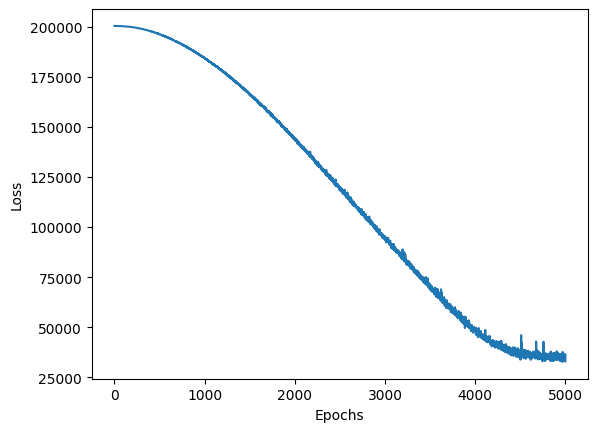

In [41]:
#plot the loss function
import matplotlib.pyplot as plt

final_losses_np = [loss.detach().numpy() for loss in final_losses]
plt.plot(range(epochs), final_losses_np)
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [42]:
y_pred = ''
with torch.no_grad():
    y_pred = model(test_categorical, test_cont)
    loss = torch.sqrt(loss_func(y_pred, y_test))
    
print('RMSE: {}'.format(loss))

RMSE: 38369.91015625


In [43]:
data_verify = pd.DataFrame(y_test.tolist(), columns = ['Test'])

In [44]:
data_predicted = pd.DataFrame(y_pred.tolist(), columns = ['Prediction'])

In [45]:
data_predicted

,Prediction
0,124045.992188
1,205638.968750
2,153325.156250
3,219959.359375
4,205680.750000
...,...
175,182558.890625
176,183644.468750
177,254551.906250
178,221337.250000


In [46]:
final_output = pd.concat([data_verify, data_predicted], axis = 1)
final_output['Difference'] = final_output['Test'] - final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,124045.992188,5954.007812
1,138887.0,205638.968750,-66751.968750
2,175500.0,153325.156250,22174.843750
3,195000.0,219959.359375,-24959.359375
4,142500.0,205680.750000,-63180.750000
